# Time Series Analysis
### Feature Selection


## Yolande Athaide

In [1]:
import sys
import os

import sklearn
#from sklearn import datasets		
from sklearn import svm    	
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

#from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA
#from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [20, 8]

plt.style.use("ggplot")
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels.stats.diagnostic as smd
from statsmodels import regression
from statsmodels.tsa.stattools import coint, adfuller

from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip3 install yfinance
import yfinance as yf
from pandas_datareader import data as pdr


# Download data from Yahoo

In [3]:
# try Yahoo using a new API code yfinance, download dataframe using pandas_datareader   
#prices_indx = pdr.get_data_yahoo(['SPY', '^GSPC','^DJI','^IXIC','^RUT', '^TNX'], start ='2010-01-01',end=None)
stocks_yf = pdr.get_data_yahoo(['BP','HPQ','FNV','WMT', 'INTC', 'MRNA', 'PFE', 'TGT'], start ='2012-01-01',end='2019-10-01')

#print(prices_yf.sort_index().head())
stocks_yf

Attributes  Adj Close                        ...     Volume                        
Symbols            BP        HPQ        FNV  ...       MRNA         PFE         TGT
Date                                         ...                                   
2012-01-03  25.304037   9.347036  34.097973  ...        NaN  53124340.0   7627900.0
2012-01-04  25.653727   9.340011  34.893620  ...        NaN  31912485.0  14091600.0
2012-01-05  25.367090   9.304898  35.088112  ...        NaN  52764821.0  19509400.0
2012-01-06  25.269646   9.269787  35.158836  ...        NaN  31613571.0  12595700.0
2012-01-09  25.263903   9.283834  35.273773  ...        NaN  41786041.0   6795300.0
...               ...        ...        ...  ...        ...         ...         ...
2019-09-25  34.344753  17.597879  93.402077  ...  3044600.0  20269685.0   3934100.0
2019-09-26  34.416740  17.607441  92.622246  ...  4448900.0  17059728.0   5166600.0
2019-09-27  34.425743  17.712589  91.437683  ...  2305200.0  17583671.0   3188600.0
2019-09-30  34.182796  18.085382  89.986610  ...  1532200.0  17205391.0   3639000.0
2019-10-01  33.921860  17.769941  89.878021  ...  1544900.0  22013001.0   3557400.0

[1949 rows x 48 columns]

# Question 1 - Extract the Adj Close prices and define them in a new variable

In [4]:
# Column names
print(list(stocks_yf.columns))
adj_close = stocks_yf["Adj Close"]
adj_close.head()

[('Adj Close', 'BP'), ('Adj Close', 'HPQ'), ('Adj Close', 'FNV'), ('Adj Close', 'WMT'), ('Adj Close', 'INTC'), ('Adj Close', 'MRNA'), ('Adj Close', 'PFE'), ('Adj Close', 'TGT'), ('Close', 'BP'), ('Close', 'HPQ'), ('Close', 'FNV'), ('Close', 'WMT'), ('Close', 'INTC'), ('Close', 'MRNA'), ('Close', 'PFE'), ('Close', 'TGT'), ('High', 'BP'), ('High', 'HPQ'), ('High', 'FNV'), ('High', 'WMT'), ('High', 'INTC'), ('High', 'MRNA'), ('High', 'PFE'), ('High', 'TGT'), ('Low', 'BP'), ('Low', 'HPQ'), ('Low', 'FNV'), ('Low', 'WMT'), ('Low', 'INTC'), ('Low', 'MRNA'), ('Low', 'PFE'), ('Low', 'TGT'), ('Open', 'BP'), ('Open', 'HPQ'), ('Open', 'FNV'), ('Open', 'WMT'), ('Open', 'INTC'), ('Open', 'MRNA'), ('Open', 'PFE'), ('Open', 'TGT'), ('Volume', 'BP'), ('Volume', 'HPQ'), ('Volume', 'FNV'), ('Volume', 'WMT'), ('Volume', 'INTC'), ('Volume', 'MRNA'), ('Volume', 'PFE'), ('Volume', 'TGT')]


Symbols,BP,HPQ,FNV,WMT,INTC,MRNA,PFE,TGT
Date,,,,,,,,
2012-01-03,25.304037,9.347036,34.097973,48.455952,18.647131,NaN,14.885120,39.109859
2012-01-04,25.653727,9.340011,34.893620,47.957977,19.080259,NaN,14.749610,38.252987
2012-01-05,25.367090,9.304898,35.088112,47.725063,19.300613,NaN,14.634439,37.113056
2012-01-06,25.269646,9.269787,35.158836,47.387714,19.186634,NaN,14.614108,37.449684
2012-01-09,25.263903,9.283834,35.273773,47.532295,19.353809,NaN,14.783491,37.158951


# Features Data

In [5]:
## Check normalized data

#display(data_features_N.head())
#display(adj_close_N.head())


# Naive Data Split for training and testing 

# Pair & Basket of Stocks Regression

In [6]:
##split the data into training and test sets

#data_features_N_train = data_features_N.loc['2012-01-01': '2019-01-31']
#data_features_N_test = data_features_N.loc['2019-02-01': '2019-10-01']

#adj_close_N_train = adj_close_N.loc['2012-01-01':'2019-01-31']
#adj_close_N_test = adj_close_N.loc['2019-02-01':'2019-10-01']

adj_close_train = adj_close.loc['2012-01-01':'2019-01-31']
adj_close_test = adj_close.loc['2019-02-01':'2019-10-01']

# Multi- Linear Regression for Walmart response

In [7]:
adj_close_train = adj_close_train.dropna()

Walmart_ret = np.log(adj_close_train['WMT']) 
BP_ret = np.log(adj_close_train['BP'])
HPQ_ret  =  np.log(adj_close_train['HPQ'])
FNV_ret   =  np.log(adj_close_train['FNV'])
INTC_ret   = np.log(adj_close_train['INTC'])
MRNA_ret   = np.log(adj_close_train['MRNA']) 
PFE_ret   = np.log(adj_close_train['PFE']) 
TGT_ret   = np.log(adj_close_train['TGT']) 
#sears_ret   = np.log(adj_close_train['SHLDQ'])

slr_tgt = regression.linear_model.OLS( Walmart_ret, sm.add_constant(TGT_ret)).fit()
slr_pred_tgt = slr_tgt.params[0] + slr_tgt.params[1]*TGT_ret

#slr_hpq = regression.linear_model.OLS( Walmart_ret, sm.add_constant(HPQ_ret)).fit()
#slr_pred_hpq = slr_hpq.params[0] + slr_hpq.params[1]*HPQ_ret

#slr_fnv = regression.linear_model.OLS( Walmart_ret, sm.add_constant(FNV_ret)).fit()
#slr_pred_fnv = slr_fnv.params[0] + slr_fnv.params[1]*FNV_ret

#slr_intc = regression.linear_model.OLS( Walmart_ret, sm.add_constant(INTC_ret)).fit()
#slr_pred_intc = slr_intc.params[0] + slr_intc.params[1]*INTC_ret

#slr_bp = regression.linear_model.OLS( Walmart_ret, sm.add_constant(BP_ret)).fit()
#slr_pred_bp = slr_bp.params[0] + slr_bp.params[1]*BP_ret

#slr_mrna = regression.linear_model.OLS( Walmart_ret, sm.add_constant(MRNA_ret)).fit()
#slr_pred_mrna = slr_mrna.params[0] + slr_mrna.params[1]*MRNA_ret

#slr_pfe = regression.linear_model.OLS( Walmart_ret, sm.add_constant(PFE_ret)).fit()
#slr_pred_pfe = slr_pfe.params[0] + slr_pfe.params[1]*PFE_ret

# Run multiple linear regression using x1, x2, x3, x4 , x5 to explain Walmart

# Fill here 
mlr = regression.linear_model.OLS(Walmart_ret, sm.add_constant(np.column_stack((TGT_ret, BP_ret, HPQ_ret, FNV_ret, INTC_ret, MRNA_ret, PFE_ret)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*TGT_ret + mlr.params[2]*BP_ret + mlr.params[3]*HPQ_ret + mlr.params[4]*FNV_ret + mlr.params[5]*INTC_ret + mlr.params[6]*MRNA_ret + mlr.params[7]*PFE_ret


# Compute adjusted R-squared for the two different models
print ('SLR: Target Adjusted R-squared:', slr_tgt.rsquared_adj) 
print ('MLR Adjusted R-squared:', mlr.rsquared_adj)
# Plot y along with the two different predictions


print ("R-squared values of linear regression")
print ("Walmart and Target: ", slr_tgt.rsquared)
print ("Walmart and Basket: ", mlr.rsquared)


SLR: Target Adjusted R-squared: 0.809315280819303
MLR Adjusted R-squared: 0.8727916465798886
R-squared values of linear regression
Walmart and Target:  0.8146120785743224
Walmart and Basket:  0.8975266041893547


SLR: Target Adjusted R-squared: 0.809315280819303
MLR Adjusted R-squared: 0.8727916465798886

R-squared values of linear regression
Walmart and Target:  0.8146120785743224
Walmart and Basket:  0.8975266041893547



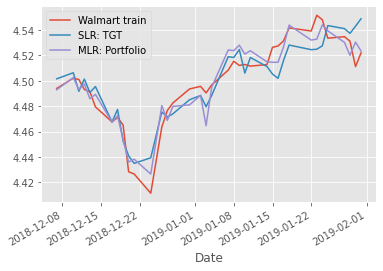

In [8]:
Walmart_ret.plot()
slr_pred_tgt.plot()
#slr_pred_mrna.plot()
#slr_pred_pfe.plot()
#slr_pred_bp.plot()
#slr_pred_hpq.plot()
#slr_pred_fnv.plot()
#slr_pred_intc.plot()
mlr_prediction.plot()

print ('SLR: Target Adjusted R-squared:', slr_tgt.rsquared_adj) 
print ('MLR Adjusted R-squared:', mlr.rsquared_adj)
# Plot y along with the two different predictions
print()

print ("R-squared values of linear regression")
print ("Walmart and Target: ", slr_tgt.rsquared)
print ("Walmart and Basket: ", mlr.rsquared)
print()

plt.legend(['Walmart train', 'SLR: TGT', 
            #'SLR: MRNA', 'SLR: PFE',
            #'SLR: BP', 'SLR: HPQ',
            #'SLR-FNV','SLR-INTC', 
            'MLR: Portfolio']);

# Apply to test data 


SLR R-squared v Target: 0.5555983151811089
MLR R-squared: 0.10756638513258276


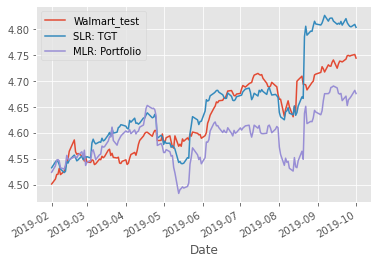

In [9]:

Walmart_test = np.log(adj_close_test['WMT']) 
TGT_test = np.log(adj_close_test['TGT'])
MRNA_test = np.log(adj_close_test['MRNA'])
PFE_test = np.log(adj_close_test['PFE'])
BP_test = np.log(adj_close_test['BP'])
HPQ_test  =  np.log(adj_close_test['HPQ'])
FNV_test  =  np.log(adj_close_test['FNV'])
INTC_test   = np.log(adj_close_test['INTC']) 
#sears_test   = np.log(adj_close_test['SHLDQ'])

# Fill here
#slr = regression.linear_model.OLS( Walmart_test, sm.add_constant(BP_test)).fit()
slr_pred2_tgt = slr_tgt.params[0] + slr_tgt.params[1]*TGT_test
#slr_pred2_mrna = slr_mrna.params[0] + slr_mrna.params[1]*MRNA_test
#slr_pred2_pfe = slr_pfe.params[0] + slr_pfe.params[1]*PFE_test
#slr_pred2_bp = slr_bp.params[0] + slr_bp.params[1]*BP_test
#slr_pred2_hpq = slr_hpq.params[0] + slr_hpq.params[1]*HPQ_test
#slr_pred2_fnv = slr_fnv.params[0] + slr_fnv.params[1]*FNV_test
#slr_pred2_intc = slr_intc.params[0] + slr_intc.params[1]*INTC_test


mlr_prediction2 = mlr.params[0] + mlr.params[1]*TGT_test + mlr.params[2]*BP_test + mlr.params[3]*HPQ_test + mlr.params[4]*FNV_test + mlr.params[5]*INTC_test + mlr.params[6]*MRNA_test + mlr.params[7]*PFE_test


# Compute adjusted R-squared over the extended time period
adj = float(len(Walmart_test) - 1)/(len(Walmart_test) - 5) # Compute adjustment factor
SST = sum((Walmart_test - np.mean(Walmart_test))**2)
SSRs = sum((slr_pred2_tgt - Walmart_test)**2)
print ('SLR R-squared v Target:', 1 - adj*SSRs/SST)
SSRm = sum((mlr_prediction2 - Walmart_test)**2)
print ('MLR R-squared:', 1 - adj*SSRm/SST)

# Plot y along with the two different predictions
Walmart_test.plot()
slr_pred2_tgt.plot()
#slr_pred2_mrna.plot()
#slr_pred2_pfe.plot()
#slr_pred2_bp.plot()
#slr_pred2_hpq.plot()
#slr_pred2_fnv.plot()
#slr_pred2_intc.plot()

mlr_prediction2.plot()
plt.legend(['Walmart_test', 'SLR: TGT',
            #'SLR:BP', 'SLR: HPQ', 'SLR: FNV', 'SLR: INTC',
            'MLR: Portfolio']);

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WMT   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.29e-14
Time:                        19:38:07   Log-Likelihood:                 105.15
No. Observations:                  37   AIC:                            -206.3
Df Residuals:                      35   BIC:                            -203.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8353      0.215      8.541      0.000       1.399       2.272
TGT            0.6406      0.052     12.401      0.000       0.536       0.745
==============================================================================
Omnibus:                        0.283   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.429
Skew:                          -0.173   Prob(JB):                        0.807
Kurtosis:                       2.602   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

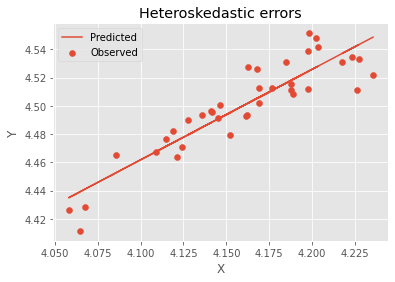

In [10]:
# Plot data and regression line
plt.scatter(TGT_ret, Walmart_ret)
plt.plot(TGT_ret, slr_pred_tgt)
plt.title('Heteroskedastic errors')
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')

# Print summary of regression results
slr_tgt.summary()

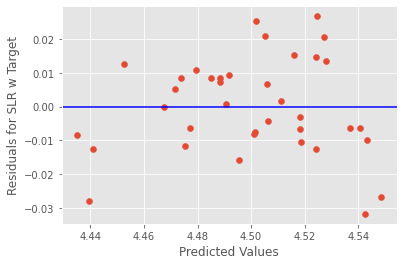

In [11]:
residuals1 = slr_tgt.resid

plt.scatter(slr_pred_tgt, residuals1);
plt.axhline(0, color='blue')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals for SLR w Target');
print()
print()


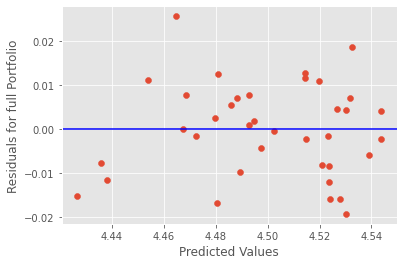

In [12]:
residuals2 = mlr.resid

plt.scatter(mlr_prediction, residuals2);
plt.axhline(0, color='blue')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals for full Portfolio');



# Data Split & Rescaling

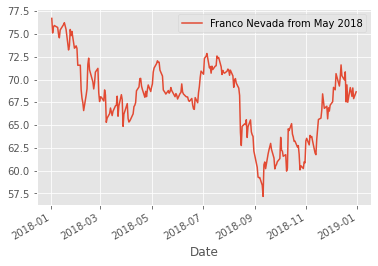

In [13]:
FrancoN = adj_close['FNV'].loc['2018-01-02':'2019-01-01']
FrancoN.plot()
plt.legend(['Franco Nevada from May 2018'])

# Pair Trading

Target and Walmart Returns are not cointegrated


-2.1721381641692052

p-value is:  0.4387743176807586


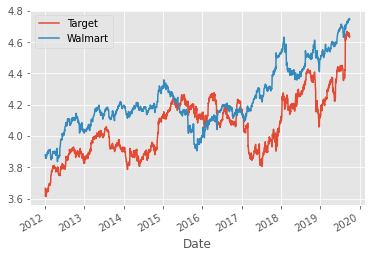

In [14]:
TGT = np.log(adj_close['TGT'])
Walmart = np.log(adj_close['WMT'])

score, pvalue, _ = coint(TGT, Walmart)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("Target and Walmart Returns are cointegrated")
    disply(score)
    print ("p-value is: ", pvalue)
    
else:
    print ("Target and Walmart Returns are not cointegrated")
    display(score)
    print ("p-value is: ", pvalue) 
    
TGT.name = "Target"
Walmart.name = "Walmart"
pd.concat([TGT, Walmart], axis=1).plot();

HP, Inc. and Intel are not cointegrated
p-value is:  0.18679778501806965


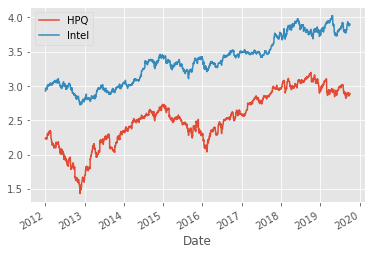

In [15]:
## Testing other pairs

Hewlett = np.log(adj_close['HPQ'])
Intel = np.log(adj_close['INTC'])
#Franco = np.log(adj_close['FNV'])

score, pvalue, _ = coint(Hewlett, Intel)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("HP, Inc. and Intel are cointegrated")
    print ("p-value is: ", pvalue)
else:
    print ("HP, Inc. and Intel are not cointegrated")
    print ("p-value is: ", pvalue)

Hewlett.name = "HPQ"
Intel.name = "Intel"
#Franco.name = "FNV"
pd.concat([Hewlett, Intel], axis=1).plot();    

Walmart and Target are not cointegrated
p-value is:  0.610751410585062


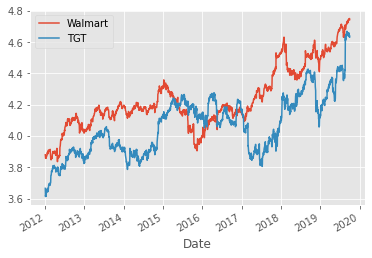

In [16]:
#Hewlett = np.log(adj_close['HPQ'])
#Intel = np.log(adj_close['INTC'])
#Franco = np.log(adj_close['FNV'])
Target = np.log(adj_close['TGT'])


score, pvalue, _ = coint(Walmart, Target)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("Walmart and Target are cointegrated")
    print ("p-value is: ", pvalue)
else:
    print ("Walmart and Target are not cointegrated")
    print ("p-value is: ", pvalue)

Target.name = "TGT"
pd.concat([Walmart, Target], axis=1).plot();  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


Moderna and Pfizer are cointegrated
p-value is:  0.0


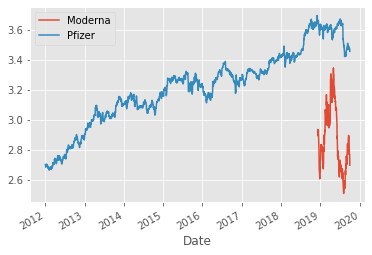

In [17]:

Moderna = np.log(adj_close['MRNA'])
Pfizer = np.log(adj_close['PFE'])

score, pvalue, _ = coint(Moderna, Pfizer)

confidence_level = 0.05

if pvalue < confidence_level:
    print ("Moderna and Pfizer are cointegrated")
    print ("p-value is: ", pvalue)
else:
    print ("Moderna and Pfizer are not cointegrated")
    print ("p-value is: ", pvalue)

Moderna.name = "Moderna"
Pfizer.name = "Pfizer"
pd.concat([Moderna, Pfizer], axis=1).plot();  

# Basket Strategy

In [18]:
# run multi-regression using FrancoN on the basket
#intel_ret   =  np.log(adj_close_train['INTC'])

mlr_fnv = regression.linear_model.OLS(FNV_ret, sm.add_constant(np.column_stack((TGT_ret, BP_ret, INTC_ret, HPQ_ret, Walmart_ret, MRNA_ret, PFE_ret)))).fit()

mlr_pred_fnv = mlr_fnv.params[0] + mlr_fnv.params[1]*TGT_ret + mlr_fnv.params[2]*BP_ret + mlr_fnv.params[3]*INTC_ret + mlr_fnv.params[4]*HPQ_ret + mlr_fnv.params[5]*Walmart_ret + mlr_fnv.params[6]*MRNA_ret + mlr_fnv.params[7]*PFE_ret

print ('Franco Nevada with full portfolio MLR R-squared:', mlr_fnv.rsquared_adj)



Franco Nevada with full portfolio MLR R-squared: 0.565124867856631


p-value for in-sample stationarity:  0.01512047804290772
t-statistics for in-sample stationarity:  -3.29462445684981


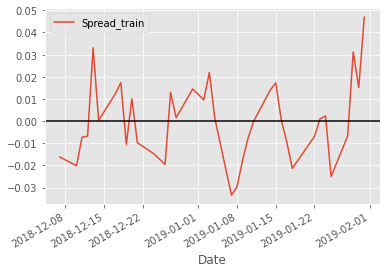

In [19]:
## in sample stationarity if p-value <0.05

spread_fnv = FNV_ret - mlr_pred_fnv
print ("p-value for in-sample stationarity: ", adfuller(spread_fnv)[1])
print ("t-statistics for in-sample stationarity: ", adfuller(spread_fnv)[0])


spread_fnv.plot()
plt.axhline(spread_fnv.mean(), color='black')
plt.legend(['Spread_train']);

Text(0, 0.5, ' price levels')

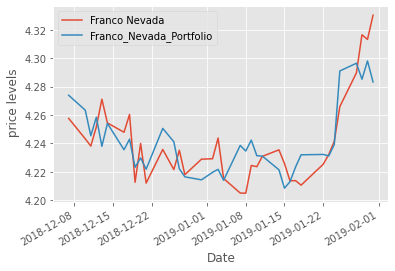

In [20]:
## Actual price levels

FNV_ret.name = "Franco Nevada"
mlr_pred_fnv.name = "Franco_Nevada_Portfolio"
pd.concat([FNV_ret, mlr_pred_fnv], axis=1).plot();
plt.ylabel(' price levels')


In [21]:
# Test Period
#intel_test   =  np.log(adj_close_test['INTC'])

mlr_pred_fnv_test = mlr_fnv.params[0] + mlr_fnv.params[1]*TGT_test + mlr_fnv.params[2]*BP_test + mlr_fnv.params[3]*INTC_test + mlr_fnv.params[4]*HPQ_test + mlr_fnv.params[5]*Walmart_test + mlr_fnv.params[6]*MRNA_test + mlr_fnv.params[7]*PFE_test

In [22]:
fn_test_spread = FNV_test - mlr_pred_fnv_test

p-value for out-sample stationarity:  0.2163421039112035
t-statistics for out-sample stationarity:  -2.17259415473903


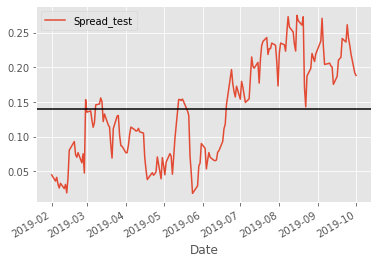

In [23]:
## p-value > 0.05 for non-stationary out sample

print ("p-value for out-sample stationarity: ", adfuller(fn_test_spread)[1])
print ("t-statistics for out-sample stationarity: ", adfuller(fn_test_spread)[0])

fn_test_spread.plot()
plt.axhline(fn_test_spread.mean(), color='black')
plt.legend(['Spread_test']);

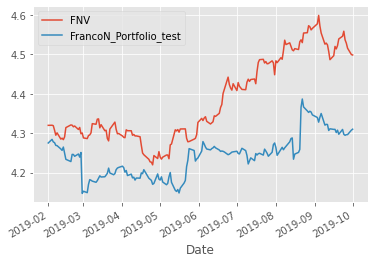

In [24]:
## Check the test set actual price levels

fn_test_spread.name = "FrancoN_test"
mlr_pred_fnv_test.name = "FrancoN_Portfolio_test"
pd.concat([FNV_test, mlr_pred_fnv_test], axis=1).plot();

In [25]:
## Next step will be cross-validating the basket strategy